In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt   #We use matplotlib library for plotting
import matplotlib.image as mpimg  
import matplotlib.colors as clr
import os
import numpy as np 
import cv2 as cv

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [28]:
imgs = []
folder = "../../Datasets/mvtec_screws_v1.0/images"

for filename in sorted(os.listdir(folder)):
    print(filename)
    img = cv.imread(os.path.join(folder,filename))
    if img is not None:
        imgs.append(img)

screws_001.png
screws_002.png
screws_003.png
screws_004.png
screws_005.png
screws_006.png
screws_007.png
screws_008.png
screws_009.png
screws_010.png
screws_011.png
screws_012.png
screws_013.png
screws_014.png
screws_015.png
screws_016.png
screws_017.png
screws_018.png
screws_019.png
screws_020.png
screws_021.png
screws_022.png
screws_023.png
screws_024.png
screws_025.png
screws_026.png
screws_027.png
screws_028.png
screws_029.png
screws_030.png
screws_031.png
screws_032.png
screws_033.png
screws_034.png
screws_035.png
screws_036.png
screws_037.png
screws_038.png
screws_039.png
screws_040.png
screws_041.png
screws_042.png
screws_043.png
screws_044.png
screws_045.png
screws_046.png
screws_047.png
screws_048.png
screws_049.png
screws_050.png
screws_051.png
screws_052.png
screws_053.png
screws_054.png
screws_055.png
screws_056.png
screws_057.png
screws_058.png
screws_059.png
screws_060.png
screws_061.png
screws_062.png
screws_063.png
screws_064.png
screws_065.png
screws_066.png
screws_067

3
3
3
3
2
2
5
2
2
4
1
2
3
4
6
9
10
9
8
8
8
2
2
3
2
3
2
2
2
2
2
3
6
7
7
6
6
6
7
7
3
3
4
3
3
3
4
7
3
6
6
4
3
3
5
4
4
3
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
7
5
5
7
5
4
9
11
7
10
8
11
8
11
10
9
10
8
9
6
6
6
5
5
5
5
1
6
7
6
4
4
7
4
4
4
5
4
4
4
4
5
5
4
5
7
5
5
5
4
4
4
5
4
4
5
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
2
0
0
0
0
0
0
0
0
0
0
2
3
2
2
2
3
2
2
3
2
2
4
3
3
3
2
4
4
4
5
5
4
4
4
5
4
4
4
4
4
4
4
4
4
5
4
4
4
4
2
4
2
3
3
2
4
4
2
2
7
5
6
6
2
2
2
2
2
2
2
2
2
3
2
2
2
2
6
8
8
9
7
6
7
7
7
7
7
6
8
6
7
9
9
7
7
6
8
7
6
9
8
7
6
10
6
6
8
8
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
4
4
3
2
2
2
2
1
2
2
2
2
4
2
2
2
2
6
7
4
3
2
3
3
3
3
3
2
2
2
3
3
8
5
4
6
7
5
4
4
4
7
8
6
10
3
2
3
2
2
2
3
3
3
7
7
9
7
6
7
7
7
6
8
7
9
7
8
9
6
7
10
7
6
6
6
6
7
6
8
6
8
8
6
10
5
7
4
4
6
5
4


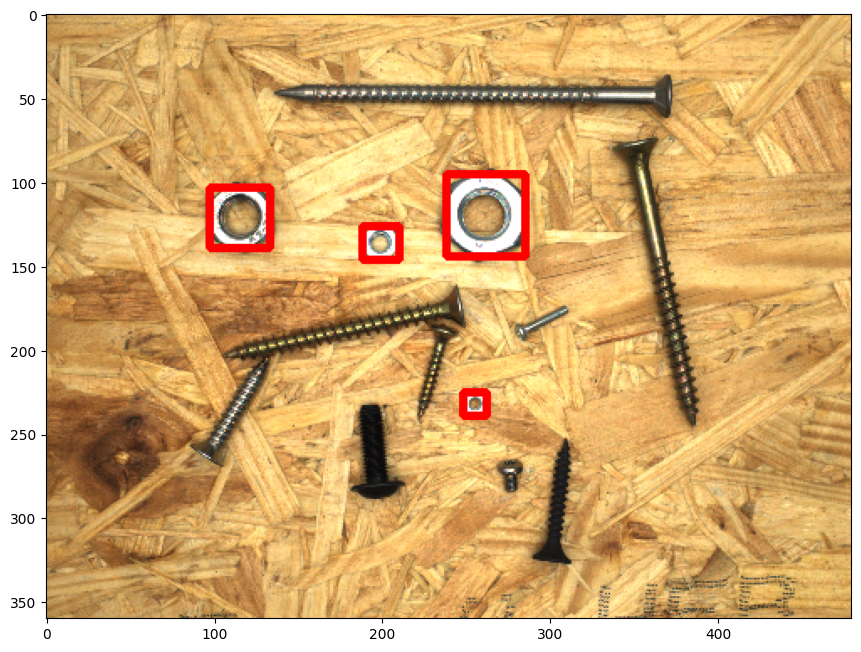

In [29]:
for img in imgs:
    
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, (480, 360))
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    median = cv.medianBlur(gray, 3)
    kernel = np.ones((3,3),np.uint8)

    dilation = cv.morphologyEx(median, cv.MORPH_DILATE, kernel)
    closing = cv.morphologyEx(dilation, cv.MORPH_CLOSE, kernel)
    _, thresh = cv.threshold(closing, 250, 255, cv.THRESH_BINARY)
    
    fidelity = False
    fidelityValue = 1.7

    copy1 = img.copy()
    c, h = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    fidelityRange = 0
    if fidelity:
        maxArea = .0
        for i in c: # With images it is convenient to know the greater area
            area = cv.contourArea(i)
            if area > maxArea:
                maxArea = area
        fidelityRange = maxArea - (maxArea * fidelityValue) # If objects have same size it prevents false detection

    totalContours = 0

    br = []
    for i in range(len(c)):
        if h[0][i][3] == -1 and cv.contourArea(c[i]) >= fidelityRange:
            totalContours += 1
            approx = cv.approxPolyDP(c[i], 3, True)
            br.append(cv.boundingRect(approx))
    for b in br:
        cv.rectangle(copy1, (b[0], b[1]), (b[0] + b[2], b[1] + b[3]), (255, 0, 0), 3) 
    plt.imshow(copy1, cmap = 'gray')
    print(totalContours)

NameError: name 'elapsed_timer' is not defined